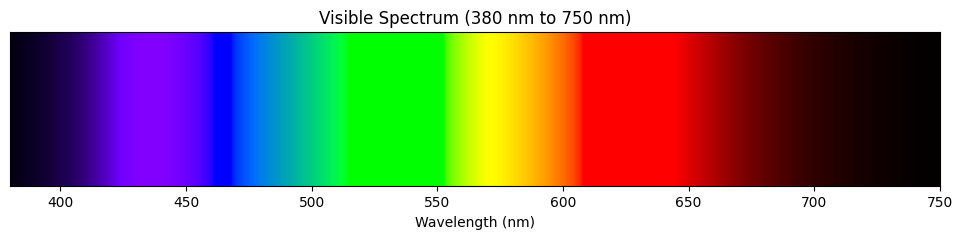

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from colour import wavelength_to_XYZ, XYZ_to_sRGB

# Define the range of visible wavelengths (380 nm to 750 nm)
wavelengths = np.linspace(380, 750, 1000)  # 1000 points for smooth gradient

# Convert to wavelength to RGB
def wavelength_to_rgb(wavelength):
    xyz = wavelength_to_XYZ(wavelength)  # Convert to XYZ color space
    rgb = XYZ_to_sRGB(xyz)  # Convert to sRGB
    rgb = np.clip(rgb, 0, 1)  # Clip values to valid range
    return rgb
rgb_colors = [wavelength_to_rgb(wavelength) for wavelength in wavelengths]

# Create an image with the gradient
gradient = np.array(rgb_colors).reshape(1, len(rgb_colors), 3)

# Plot the gradient
plt.figure(figsize=(12, 2))
plt.imshow(gradient, aspect="auto", extent=[380, 750, 0, 1])
plt.title("Visible Spectrum (380 nm to 750 nm)")
plt.xlabel("Wavelength (nm)")
plt.yticks([])
plt.show()

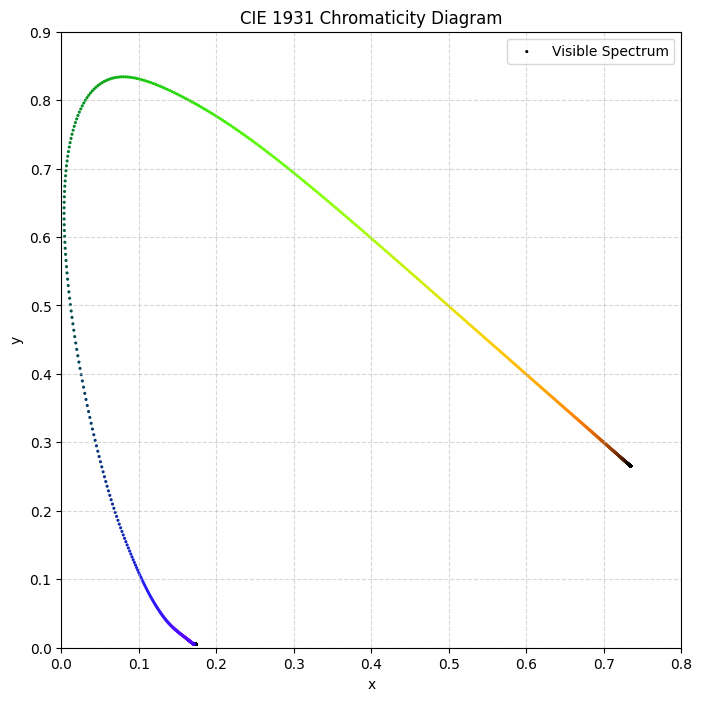

In [53]:
from typing import *
import numpy as np
import matplotlib.pyplot as plt
from colour import wavelength_to_XYZ

# Function to normalize XYZ to xy chromaticity coordinates
def xyz_to_xy(XYZ):
    X, Y, Z = XYZ
    total = X + Y + Z
    return (X / total, Y / total) if total > 0 else (0, 0)

# Generate wavelengths in the visible spectrum (380 nm to 750 nm)
wavelengths = np.linspace(380, 750, 1000)

# Calculate xy chromaticity coordinates for each wavelength
xy_coordinates = []
colors = []
for wavelength in wavelengths:
    XYZ = wavelength_to_XYZ(wavelength)
    xy = xyz_to_xy(XYZ)
    xy_coordinates.append(xy)
    
    # Convert XYZ to RGB for plotting the corresponding color
    rgb = np.clip(XYZ, 0, 1)  # Clip values to valid range
    colors.append(rgb)

xy_coordinates = np.array(xy_coordinates)

# Plot the chromaticity diagram
plt.figure(figsize=(8, 8))
# plt.plot(xy_coordinates[:, 0], xy_coordinates[:, 1], color="black", lw=0.5, label="Visible Spectrum")
plt.scatter(xy_coordinates[:, 0], xy_coordinates[:, 1], c=colors, s=5, edgecolor="none", label="Visible Spectrum")
plt.title("CIE 1931 Chromaticity Diagram")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 0.8)
plt.ylim(0, 0.9)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


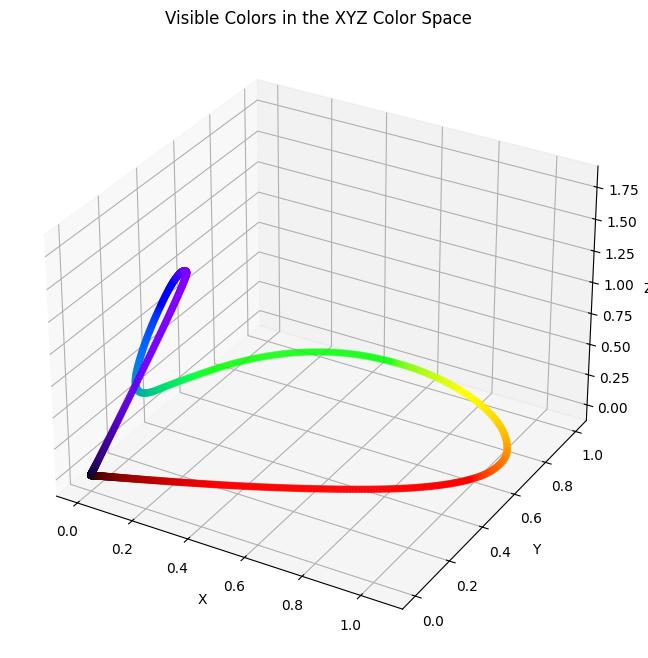

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from colour import wavelength_to_XYZ, XYZ_to_sRGB

# Function to normalize XYZ to xy chromaticity coordinates
def xyz_to_xy(XYZ):
    X, Y, Z = XYZ
    total = X + Y + Z
    return (X / total, Y / total) if total > 0 else (0, 0)

# Generate wavelengths in the visible spectrum (380 nm to 750 nm)
wavelengths = np.linspace(380, 750, 1000)

# Calculate XYZ coordinates and corresponding RGB colors for each wavelength
XYZ_coordinates = []
colors = []
for wavelength in wavelengths:
    XYZ = wavelength_to_XYZ(wavelength)
    rgb = XYZ_to_sRGB(XYZ)  # Convert XYZ to RGB
    rgb = np.clip(rgb, 0, 1)  # Clip values to valid range for RGB
    XYZ_coordinates.append(XYZ)
    colors.append(rgb)

# Convert lists to numpy arrays for easier handling
XYZ_coordinates = np.array(XYZ_coordinates)
colors = np.array(colors)

def plot_with_matplotlib():
    # Extract X, Y, Z components for 3D plotting
    X_vals = XYZ_coordinates[:, 0]
    Y_vals = XYZ_coordinates[:, 1]
    Z_vals = XYZ_coordinates[:, 2]

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X_vals, Y_vals, Z_vals, c=colors, marker='o')

    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Visible Colors in the XYZ Color Space')

    # Display the plot
    plt.show()
plot_with_matplotlib()

In [25]:
# Create the point cloud using trimesh
import numpy as np
import trimesh
import scipy
from colour import wavelength_to_XYZ, XYZ_to_sRGB
# Generate wavelengths in the visible spectrum (380 nm to 750 nm)
wavelengths = np.linspace(380, 750, 1000)
# Wavelengths to XYZ
XYZ = np.array([
    wavelength_to_XYZ(wavelength) 
    for wavelength in wavelengths
])

# XYZ to RGB
sRGB = np.array([
    np.clip(
        XYZ_to_sRGB(wavelength),
    0,1)
    for wavelength in XYZ
])

# 3D scene
trimesh.Scene([
    trimesh.points.PointCloud(
        XYZ, 
        colors=sRGB
    ),
    trimesh.Trimesh(
        vertices=[[-1, 0, -1], [1, 0, -1], [1, 0, 1], [-1, 0, 1]],
        faces=[[2, 1, 0], [3,2,0]],
    )
]).show()

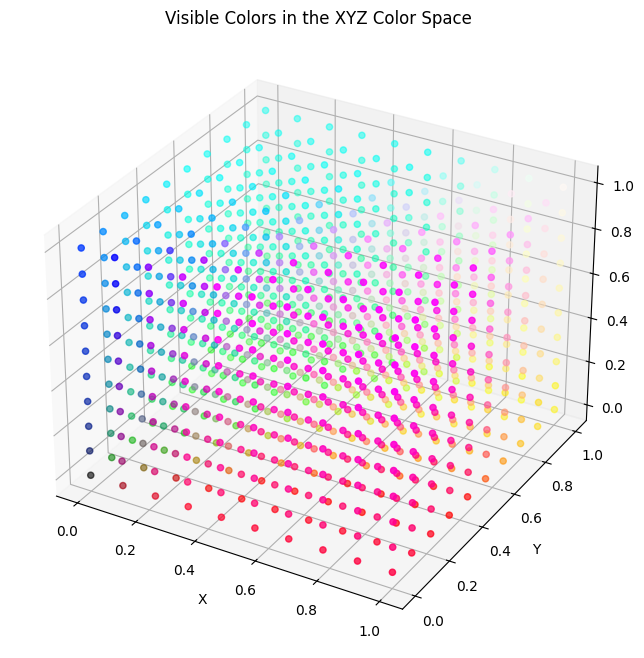

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from colour import XYZ_to_sRGB

# Function to generate visible colors in the XYZ color space
def generate_xyz_colors(x_range, y_range, z_range):
    points = []
    for X in x_range:
        for Y in y_range:
            for Z in z_range:
                XYZ = np.array([X, Y, Z])
                rgb = XYZ_to_sRGB(XYZ)
                rgb = np.clip(rgb, 0, 1)  # Ensure the RGB values are valid
                points.append((*XYZ, *rgb))
    return np.array(points)

# Parameters for XYZ grid
x_range = np.linspace(0, 1, 10)  # Grid for X axis
y_range = np.linspace(0, 1, 10)  # Grid for Y axis
z_range = np.linspace(0, 1, 10)  # Grid for Z axis

# Generate XYZ color points
points = generate_xyz_colors(x_range, y_range, z_range)

# Extract XYZ components and RGB colors
X_vals = points[:, 0]
Y_vals = points[:, 1]
Z_vals = points[:, 2]
colors = points[:, 3:6]  # RGB values

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_vals, Y_vals, Z_vals, c=colors, marker='o')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visible Colors in the XYZ Color Space')

# Display the plot
plt.show()
